In [1]:
import glob
from datetime import date

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['svg.fonttype'] = 'none'


In [2]:
ministry_mapping = {
    'BBk': 'BBank',
    'BK Amt': 'BK',
    'BMELV': 'BMEL',
    'BMELVV': 'BMEL',
    'BMVBS': 'BMVI',
    'BPrA': 'BPräsA',
    'BMJ': 'BMJV',
    'BMJVV': 'BMJV',
    'BMVI': 'BMVBS',
    'BMU': 'BMUB',
}

def load_dataframe(filename):
    year = int(filename.split('_')[-1].split('.')[0])
    df = pd.read_csv(filename).fillna(0)
    df = df[~df['Ressort'].str.contains('Gesamt')]
    df['jahr'] = date(year, 1, 1)
    df['jahr'] = pd.to_datetime(df['jahr'])
    df['GB'] = df['Ressort'].str.contains('GB')
    df['Ressort'] = df['Ressort'].str.replace(' GB', '')
    df['Ressort'] = df['Ressort'].str.replace('*', '')
    for k, v in ministry_mapping.items():
        df['Ressort'] = df['Ressort'].str.replace('^' + k + '$', v)
    return df

filenames = glob.glob('data/ifg_statistik_*.csv')
df = pd.concat([load_dataframe(filename) for filename in filenames])
df.to_csv('ifg_statistik.csv')
df.head()

,Abhilfe,Abweisung,Antrag zurückgenommen,Anträge in Bearbeitung zum Jahresbeginn,Auslagen,Eingang Erstanträge,Eingang Klagen,Eingang Klagen,Eingang Widersprüche,Eingang Widersprüche,...,W- Gebühren erhoben (> 30 ),Widerspruch in Bearbeitung,Widersprüche in Bearbeitung zum Jahresbeginn,Zurückweisung,anhängig,anhängige Klagen zum Jahresbeginn,jahr,sonstige Erledigung,sonstige Erledigung.1,sonstige Erledigung.2
0,0,0,2,NaN,1,38,1,NaN,4,NaN,...,0,0,NaN,3,1,NaN,2006-01-01,NaN,NaN,NaN
1,0,0,0,NaN,0,13,0,NaN,0,NaN,...,0,0,NaN,0,0,NaN,2006-01-01,NaN,NaN,NaN
3,0,0,0,NaN,3,18,0,NaN,3,NaN,...,0,1,NaN,0,0,NaN,2006-01-01,NaN,NaN,NaN
4,0,0,4,NaN,1,117,0,NaN,1,NaN,...,0,0,NaN,0,0,NaN,2006-01-01,NaN,NaN,NaN
6,4,0,7,NaN,16,131,3,NaN,16,NaN,...,0,2,NaN,8,3,NaN,2006-01-01,NaN,NaN,NaN


## Eingang Erstanträge über die Jahre

(0, 10000.0)

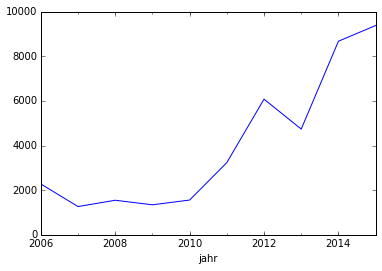

In [3]:
df.groupby('jahr')['Eingang Erstanträge'].sum().plot()
plt.ylim(0)

/Users/sw/.virtualenvs/notebook3/lib/python3.5/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


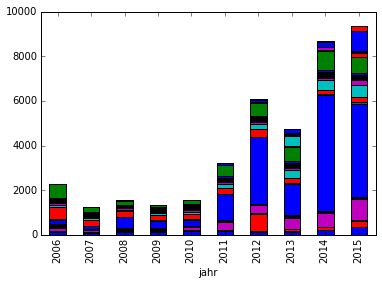

In [4]:
ax = df.groupby([df.jahr.dt.year, 'Ressort'])['Eingang Erstanträge'].sum().unstack().plot(kind='bar', stacked=True)
ax.legend().set_visible(False)

In [6]:
def transparenz_prozent(g):
    return (g['Informationszugang gewährt'].sum() +
            g['Informationszugang teilweise gewährt'].sum()) / g['Eingang Erstanträge'].sum() * 100

out_group = df.groupby(['Ressort', 'jahr'])[['Eingang Erstanträge', 'Informationszugang gewährt', 'Informationszugang teilweise gewährt']].sum()

out_group['transparency'] = out_group[['Informationszugang gewährt', 'Informationszugang teilweise gewährt']].sum(1) / out_group['Eingang Erstanträge'] * 100
out_group['transparency'] = out_group['transparency'].round()
out_group = out_group.reset_index()
out_group = out_group.rename(columns={'Ressort': 'name', 'jahr': 'year', 'Eingang Erstanträge': 'count'})
out_group = out_group.drop(['Informationszugang gewährt', 'Informationszugang teilweise gewährt'], axis=1)
out_group['year'] = pd.to_datetime(out_group['year']).dt.year
# out_group.to_csv('data.csv', index=False)
out_group.head()

,name,year,count,transparency
0,AA,2006,131,62
1,AA,2007,88,64
2,AA,2008,132,71
3,AA,2009,139,71
4,AA,2010,158,65
